#STEP 0 : Import và nhập dữ liệu

In [38]:
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [39]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'D:\\Spark\\spark-3.1.3-bin-hadoop2.7'

In [40]:
import scikitplot as skplt

In [41]:
import time
# Basic libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import builtins
import matplotlib.ticker as mtick

# Sklearn 
# import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

#Vector libs
from pyspark.ml.feature import VectorAssembler
from sklearn.model_selection import train_test_split

#Vector libs
from pyspark.ml.feature import VectorAssembler

# model libs   
import pyspark
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel

# import xgboost as xgb
from xgboost import XGBClassifier
# import scikitplot as skplt


# Evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# SQL function libs
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, DoubleType


spark = SparkSession.builder.appName("XGB").getOrCreate()
file_path = 'sample_data.csv'


schema = StructType() \
.add("v_int_times", DoubleType(),True							)\
.add("v_int_duration",DoubleType(),True                          )\
.add("v_usage_day",DoubleType(),True                )\
.add("t_usage_ic_day",DoubleType(),True                           )\
.add("register_days",DoubleType(),True                        )\
.add("t_call_duration",DoubleType(),True              )\
.add("re_charge_day",DoubleType(),True                  )\
.add("v_duration",DoubleType(),True              )\
.add("balance_basic_bod",DoubleType(),True                  )\
.add("t_charge_day",DoubleType(),True        )\
.add("t_usage_day",DoubleType(),True            )\
.add("t_num_times",DoubleType(),True        )\
.add("g_reg_fee",DoubleType(),True        )\
.add("v_times",DoubleType(),True       )\
.add("t_num_ic_times",DoubleType(),True                         )\
.add("v_times_ic",DoubleType(),True               )\
.add("v_int_times_ic",DoubleType(),True                   )\
.add("v_duration_ic",DoubleType(),True               )\
.add("t_org_charge",DoubleType(),True               )\
.add("stddev_v_duration",DoubleType(),True               )\
.add("t_tot_charge_over_stddev_3m",DoubleType(),True               )\
.add("is_3k3d",DoubleType(),True              )\
.add("t_tot_charge",DoubleType(),True                         )\
.add("churn",DoubleType(),True                  )\
.add("delta_t_tot_charge",DoubleType(),True                         )\
.add("stddev_t_org_charge",DoubleType(),True                         )\
    
df = spark.read.option("header", True).schema(schema).csv(file_path)

display(df)
df.columns
df.printSchema()
df.limit(10).toPandas()

DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_charge: double, stddev_t_org_charge: double]

root
 |-- v_int_times: double (nullable = true)
 |-- v_int_duration: double (nullable = true)
 |-- v_usage_day: double (nullable = true)
 |-- t_usage_ic_day: double (nullable = true)
 |-- register_days: double (nullable = true)
 |-- t_call_duration: double (nullable = true)
 |-- re_charge_day: double (nullable = true)
 |-- v_duration: double (nullable = true)
 |-- balance_basic_bod: double (nullable = true)
 |-- t_charge_day: double (nullable = true)
 |-- t_usage_day: double (nullable = true)
 |-- t_num_times: double (nullable = true)
 |-- g_reg_fee: double (nullable = true)
 |-- v_times: double (nullable = true)
 |-- t_num_ic_times: double (nullable = true)
 |-- v_times_ic: double (nullable = true)
 |-- v_int_times_ic: double (nullable = true)
 |-- v_duration_ic: double (nullable = true)
 |-- t_org_charge: double (nullable = true)
 |-- stddev_v_duration: double (nullable = true)
 |-- t_tot_charge_over_stddev_3m: double (nullable = true)
 |-- is_3k3d: double (nullable = true)
 |-- t_to

,v_int_times,v_int_duration,v_usage_day,t_usage_ic_day,register_days,t_call_duration,re_charge_day,v_duration,balance_basic_bod,t_charge_day,...,v_int_times_ic,v_duration_ic,t_org_charge,stddev_v_duration,t_tot_charge_over_stddev_3m,is_3k3d,t_tot_charge,churn,delta_t_tot_charge,stddev_t_org_charge
0,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,1.0,1.810000e+07,1.0,0.0,0.027027
1,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,0.0,1.810000e+07,1.0,0.0,0.000000
2,4.0,8.0,24.0,40.0,3.0,3.0,0.0,0.0,0.0,3.0,...,1.0,0.0,44.0,0.21,0.19,0.0,1.810000e+07,1.0,0.0,0.000000
3,2.0,6.0,16.0,120.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,68.0,0.11,0.30,1.0,4.340000e+07,1.0,2.0,0.081081
4,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,24.0,0.05,0.11,1.0,7.480000e+07,1.0,1.0,0.054054
5,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,48.0,0.05,0.21,0.0,3.990000e+07,1.0,1.0,0.027027
6,4.0,6.0,24.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.05,0.04,0.0,1.840000e+09,1.0,0.0,0.000000
7,2.0,6.0,16.0,120.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,93.0,0.11,0.41,1.0,1.230000e+08,1.0,2.0,0.081081
8,4.0,6.0,24.0,96.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,872.0,0.16,3.84,0.0,3.587000e+03,1.0,1.0,0.027027
9,2.0,6.0,16.0,120.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,8.0,0.05,0.04,1.0,6.260000e+07,1.0,1.0,0.054054


In [42]:
#step 2 view dữ liệu 
# df.show( 1, False )
# df.columns
display (df)


DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_charge: double, stddev_t_org_charge: double]

In [43]:
#step 3  create  id  
from pyspark.sql import Window
from pyspark.sql.functions import rank, min
from pyspark.sql.functions import desc
# window = Window.partitionBy("sort").orderBy("duration") 

##### Tạo trường id theo row number của cột duration :
df1 = df.withColumn("id", F.row_number().over(Window.orderBy("t_tot_charge")))
display (df1)
# df = df.withColumn("id", rank().over(window))
# df1.columns


DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_charge: double, stddev_t_org_charge: double, id: int]

In [44]:
# Step 4: Thống kê về dữ liệu 

df.agg({'t_tot_charge': 'max'}).show()
# df_buck.agg({'duration': 'min'}).show()
 

stats = df.selectExpr("min(t_tot_charge)", "max(t_tot_charge)", "mean(t_tot_charge)",
                                           "percentile(t_usage_ic_day, 0.5)", "variance(t_tot_charge)",
                                           "stddev(t_tot_charge)")
stats.show()  

# df1.agg({"duration": "max"}).collect()

+-----------------+
|max(t_tot_charge)|
+-----------------+
|          4.98E11|
+-----------------+

+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+
|min(t_tot_charge)|max(t_tot_charge)|mean(t_tot_charge)|percentile(t_usage_ic_day, CAST(0.5 AS DOUBLE), 1)|variance(t_tot_charge)|stddev(t_tot_charge)|
+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+
|              0.0|          4.98E11|  5.302765968099E9|                                              80.0|  7.594967897377338E20|2.755896931559186E10|
+-----------------+-----------------+------------------+--------------------------------------------------+----------------------+--------------------+



In [45]:
# Step 5 Muốn thưc hiện các truy vấn sql để khảo sát dữ liệu thì phải tạo bảng tạm 
# df_buck đang ở dạng pyspark dataframe, thì mình phải chuyển sang dạng bảng tạm để truy vấn sql 

df1.createOrReplaceTempView ("df_sql")

In [46]:
spark.sql("select churn,  count ( * ) from df_sql group by churn ;").show()

+-----+--------+
|churn|count(1)|
+-----+--------+
|  0.0|    6782|
|  1.0|    3218|
+-----+--------+



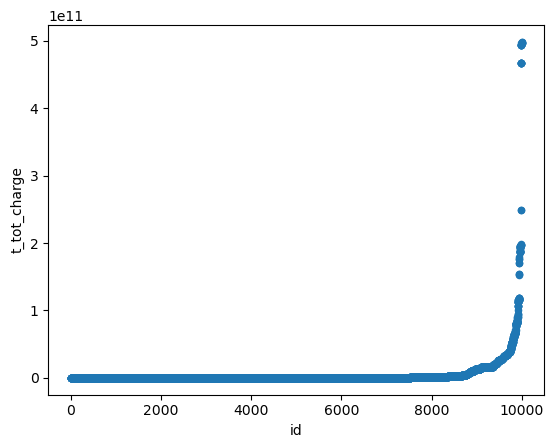

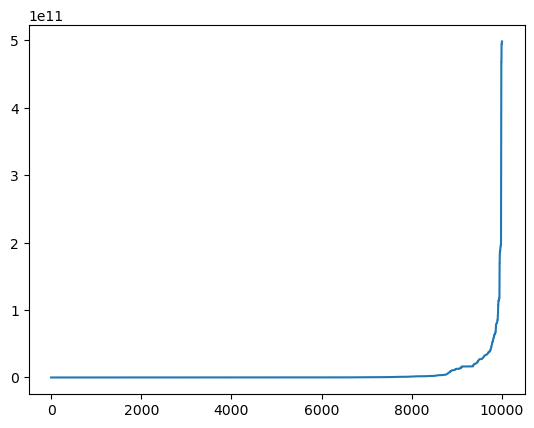

In [47]:
# step 7 visualize data 

# np.random.seed(1234)
# df = pd.DataFrame(np.random.randn(10, 4),columns=['Col1', 'Col2', 'Col3', 'Col4'])
# boxplot = df_pandas.boxplot(column=['duration (second)'])  
df_pandas = df1.toPandas()
ax2 = df_pandas.plot.scatter(x='id',
                      y='t_tot_charge',
                      colormap='viridis')

import matplotlib.pyplot as plt 
fix, ax1 = plt.subplots() 
ax1.plot(df_pandas["id"], df_pandas["t_tot_charge"])
plt.show()   

In [48]:
plt.figure(figsize=(15,10))

df_pandas.corr(method ='pearson')['churn'].sort_values(ascending = False)
# df_pandas.corr(method ='pearson')['churn'].sort_values(ascending = False).plot(kind='bar')

churn                          1.000000
stddev_t_org_charge            0.375690
is_3k3d                        0.309604
v_duration                     0.297519
id                             0.276498
delta_t_tot_charge             0.275051
t_tot_charge_over_stddev_3m    0.244728
t_org_charge                   0.244703
t_tot_charge                   0.213664
t_charge_day                   0.187845
stddev_v_duration              0.167760
g_reg_fee                      0.143643
balance_basic_bod              0.124718
t_usage_day                    0.113061
t_usage_ic_day                 0.104012
t_num_times                    0.089035
v_times                        0.073506
re_charge_day                  0.025321
register_days                 -0.008320
v_duration_ic                 -0.024378
t_call_duration               -0.028386
t_num_ic_times                -0.029121
v_int_times_ic                -0.063639
v_times_ic                    -0.063639
v_usage_day                   -0.084097


<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, '% of 3k3d')

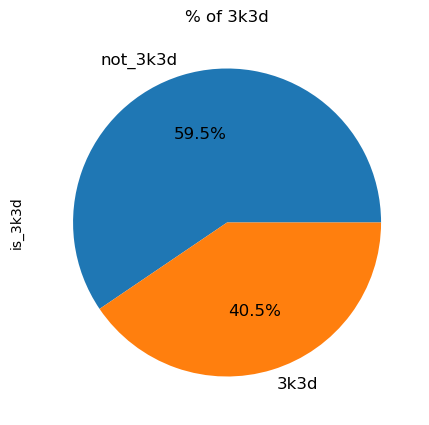

In [49]:
import matplotlib.ticker as mtick
# Chỉnh lại đoạn này
ax = (df_pandas['is_3k3d'].value_counts()*100.0 /len(df_pandas))\
.plot.pie(autopct='%.1f%%', labels = ['not_3k3d', '3k3d'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('i',fontsize = 12)
ax.set_title('% of 3k3d', fontsize = 12)

In [50]:
# step 8 split train test 

# chia thành 2 tập train test 
splits = df1.randomSplit([0.8, 0.2], 2001 )
train = splits[0]
test = splits[1]


print(train.count())
print(test.count())

print(len(train.columns))
print(len(test.columns))

8012
1988
27
27


In [51]:
# Step 9 Khảo sát dữ liệu 
print ( "train")
m1= train.groupby('churn').count()
m1.show()
print(m1.collect())
m1_tong = (m1.collect()[0][1] + m1.collect()[1][1])
print(m1_tong)


print( "test")
m2= test.groupby('churn').count()
m2.show()
print(m2.collect())
m2_tong = (m2.collect()[0][1] + m2.collect()[1][1])
print(m2_tong)

print ("bảng tổng hợp ")
x= pd.DataFrame([[m1.collect()[0][1] ,m1.collect()[0][1]/m1_tong*100 , m1.collect()[1][1] , m1.collect()[1][1]/m1_tong*100,m1_tong]\
,[m2.collect()[0][1] ,m2.collect()[0][1]/m2_tong*100 , m2.collect()[1][1] , m2.collect()[1][1]/m2_tong*100,m2_tong]\
],columns=['sltb_0','tyle_0','sltb_1','tyle_1','tong'], index =['train','test'])
print(x)
x = spark.createDataFrame(x)
x.show()

train
+-----+-----+
|churn|count|
+-----+-----+
|  0.0| 5413|
|  1.0| 2599|
+-----+-----+

[Row(churn=0.0, count=5413), Row(churn=1.0, count=2599)]
8012
test
+-----+-----+
|churn|count|
+-----+-----+
|  1.0|  619|
|  0.0| 1369|
+-----+-----+

[Row(churn=1.0, count=619), Row(churn=0.0, count=1369)]
1988
bảng tổng hợp 
       sltb_0     tyle_0  sltb_1     tyle_1  tong
train    5413  67.561158    2599  32.438842  8012
test      619  31.136821    1369  68.863179  1988
+------+------------------+------+-----------------+----+
|sltb_0|            tyle_0|sltb_1|           tyle_1|tong|
+------+------------------+------+-----------------+----+
|  5413| 67.56115826260609|  2599|32.43884173739391|8012|
|   619|31.136820925553323|  1369|68.86317907444668|1988|
+------+------------------+------+-----------------+----+



In [52]:
# step 10 take feature cols
print(type(train.columns))

x = [train, test]
# list_t = []
# for k in (x) : 
#     list_t.append(k.drop('churn') )
# train_m  =  list_t[0]
# test_m  =  list_t[1]

train_m  =  x[0]
test_m   = x[1]

# # chỉ lấy các cột feature để biến đổi sau đó gán vào biến number_cols để bước sau biến đổi vectors 
number_cols = [ x for x in train_m.columns if x not in ['id', 'churn'] ]

print(len(number_cols))

<class 'list'>
25


In [53]:
# Bước 11 fill null , double 
from pyspark.sql.functions import col

def cast_all(input_df):
    return input_df.select([col(col_name).cast("Double") for col_name in input_df.columns])

train_m = cast_all(train_m)
test_m = cast_all(test_m)

df_train_fillna = train_m.fillna(-1, subset = number_cols )  
df_test_fillna = test_m.fillna(-1, subset = number_cols )        

df_train_fillna.printSchema()
df_test_fillna.printSchema()


root
 |-- v_int_times: double (nullable = false)
 |-- v_int_duration: double (nullable = false)
 |-- v_usage_day: double (nullable = false)
 |-- t_usage_ic_day: double (nullable = false)
 |-- register_days: double (nullable = false)
 |-- t_call_duration: double (nullable = false)
 |-- re_charge_day: double (nullable = false)
 |-- v_duration: double (nullable = false)
 |-- balance_basic_bod: double (nullable = false)
 |-- t_charge_day: double (nullable = false)
 |-- t_usage_day: double (nullable = false)
 |-- t_num_times: double (nullable = false)
 |-- g_reg_fee: double (nullable = false)
 |-- v_times: double (nullable = false)
 |-- t_num_ic_times: double (nullable = false)
 |-- v_times_ic: double (nullable = false)
 |-- v_int_times_ic: double (nullable = false)
 |-- v_duration_ic: double (nullable = false)
 |-- t_org_charge: double (nullable = false)
 |-- stddev_v_duration: double (nullable = false)
 |-- t_tot_charge_over_stddev_3m: double (nullable = false)
 |-- is_3k3d: double (nulla

In [54]:
# step 12 : transform vector
class_col = 'churn'
class_name = ['model_spark']
primary_keys = [ 'id']
 
#
 
vector_feature_columns = number_cols
assembler = VectorAssembler(inputCols = vector_feature_columns , outputCol='features_m')
 
# m
train_df_transformed = assembler.transform(df_train_fillna)  # chạy lệnh tạo vecto
test_df_transformed = assembler.transform(df_test_fillna)  # chạy lệnh tạo vecto
 
print(train_df_transformed)  
print(test_df_transformed)  
 

DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, v_int_times_ic: double, v_duration_ic: double, t_org_charge: double, stddev_v_duration: double, t_tot_charge_over_stddev_3m: double, is_3k3d: double, t_tot_charge: double, churn: double, delta_t_tot_charge: double, stddev_t_org_charge: double, id: double, features_m: vector]
DataFrame[v_int_times: double, v_int_duration: double, v_usage_day: double, t_usage_ic_day: double, register_days: double, t_call_duration: double, re_charge_day: double, v_duration: double, balance_basic_bod: double, t_charge_day: double, t_usage_day: double, t_num_times: double, g_reg_fee: double, v_times: double, t_num_ic_times: double, v_times_ic: double, 

In [55]:
#Bước 13 lựa chọn để đưa vào mô hình
train_m = train_df_transformed.select('id', 'features_m', class_col)   
 
test_m = test_df_transformed.select('id', 'features_m', class_col)   
# test_m.columns
train_m.columns

['id', 'features_m', 'churn']

# XGBoost

In [56]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'e321e760a',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': 'D:\\anaconda3\\Lib\\site-packages\\IPython',
 'ipython_version': '7.31.1',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19045-SP0',
 'sys_executable': 'd:\\anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit '
                '(AMD64)]'}


In [57]:
X = df_pandas.drop('churn', axis=1)
y = df_pandas['churn'].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the XGBoost classifier

xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [58]:
# Bước 15 : chạy model 
model_m = xgb.fit(X_train, y_train)

In [59]:
# basePath = "D:/HUST/20222/Code_DATN/models"
# model_m.save_model(basePath + "/model_xgboost") 
# #load model 
# model_m = xgb.Booster().load_model("D:/HUST/20222/Code_DATN/models/model_xgboost")

In [60]:
import pickle
pickle.dump(model_m, open("D:/HUST/20222/Code_DATN/models/model_xgboost.pickle", 'wb'))
model_m = pickle.load(open("D:/HUST/20222/Code_DATN/models/model_xgboost.pickle", 'rb'))

## Đánh giá model

### ROC

In [61]:
# Bước 16   ĐÁNH GIÁ MODEL BẰNG ROC 

Train ROC-AUC score: 0.9702125685311906
Test ROC-AUC score: 0.9391160814939302


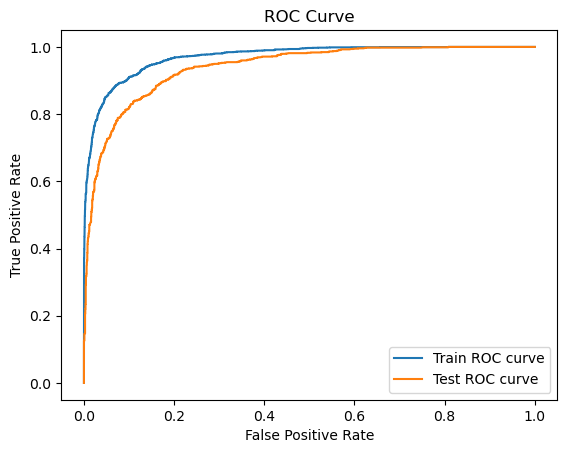

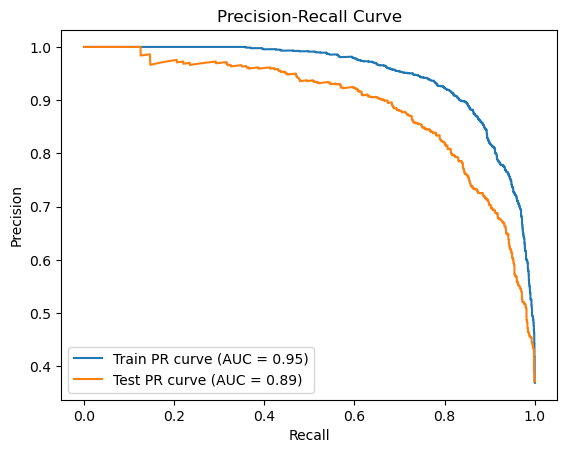

Train F1-score: 0.8627634660421545
Test F1-score: 0.7973784817039867


In [62]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# Make predictions on the training and test sets
y_train_pred = model_m.predict(X_train)
y_train_prob = model_m.predict_proba(X_train)[:, 1]
y_test_pred = model_m.predict(X_test)
y_test_prob = model_m.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score for the training and test sets
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
print('Train ROC-AUC score:', train_roc_auc)
print('Test ROC-AUC score:', test_roc_auc)

# Calculate the ROC curve for the training and test sets and plot them
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(train_fpr, train_tpr, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, label='Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate the precision-recall curve for the training and test sets and plot them
train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_prob)
test_precision, test_recall, _ = precision_recall_curve(y_test, y_test_prob)
train_pr_auc = auc(train_recall, train_precision)
test_pr_auc = auc(test_recall, test_precision)
plt.plot(train_recall, train_precision, label=f'Train PR curve (AUC = {train_pr_auc:.2f})')
plt.plot(test_recall, test_precision, label=f'Test PR curve (AUC = {test_pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Calculate the F1-score for the training and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print('Train F1-score:', train_f1)
print('Test F1-score:', test_f1)

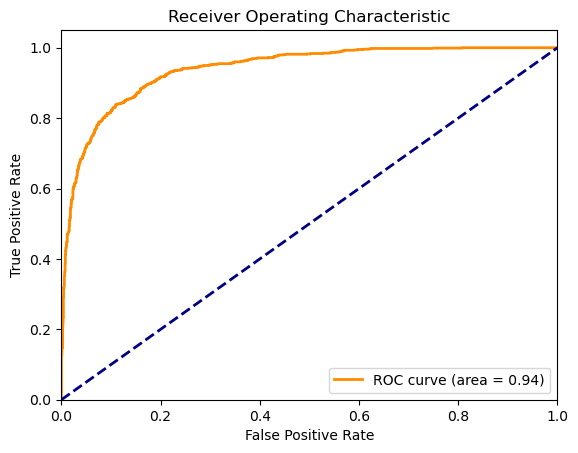

In [63]:
# Make predictions on the test set
y_pred_proba = model_m.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

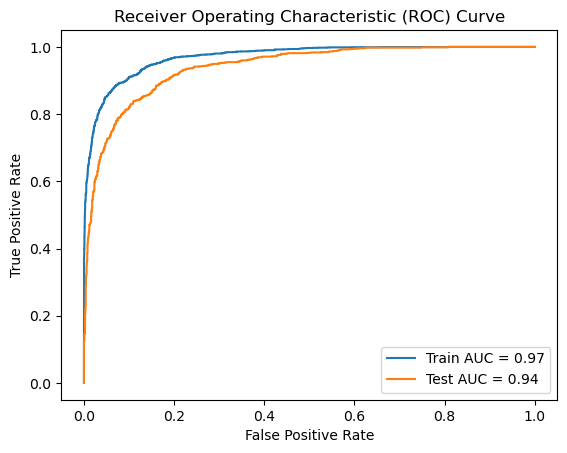

In [64]:
# Obtain the predicted probabilities for both the training and test sets
train_probs = model_m.predict_proba(X_train)[:, 1]
test_probs = model_m.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the training and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)

# Calculate the Area Under the Curve (AUC) scores for the training and test sets
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Plot the ROC curves for the training and test sets
plt.plot(train_fpr, train_tpr, label='Train AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

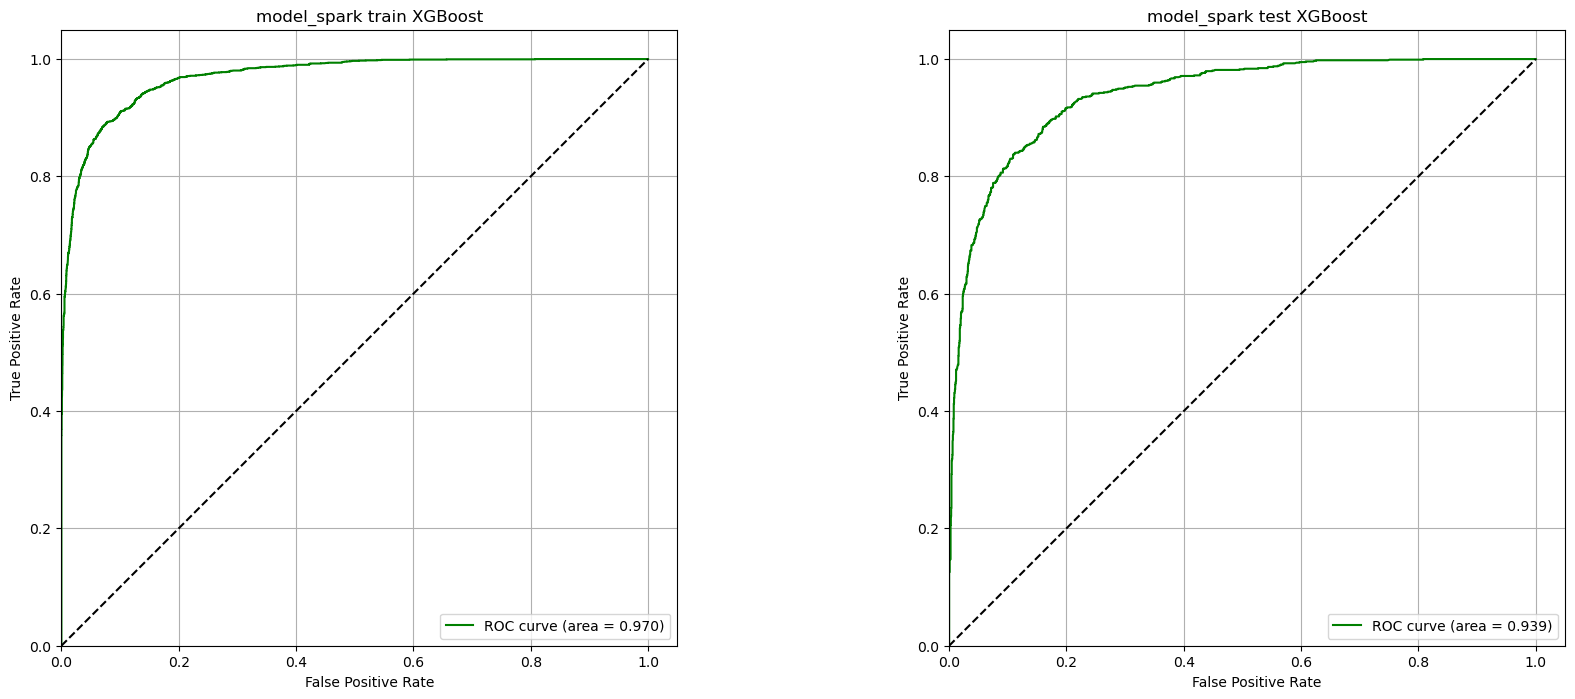

In [65]:
##### m
# fig, (ax1m, ax2m, ax3m) = plt.subplots(1, 3, figsize=(21,8))
fig, (ax1m, ax3m) = plt.subplots(1, 2, figsize=(21,8))

#ax1 = fig.add_subplot(1,3,1)
ax1m.plot(train_fpr, train_tpr, color='green', label='ROC curve (area = %0.3f)' % train_auc)
ax1m.plot([0,1], [0,1], 'k--')
ax1m.set_ylabel('True Positive Rate')
ax1m.set_xlabel('False Positive Rate')
ax1m.set_xlim([0.0, 1.05])
ax1m.set_ylim([0.0, 1.05])
ax1m.set_title('{0} train XGBoost'.format(class_name[0]))
ax1m.legend(loc='lower right')
ax1m.grid(True)
ax1m.set_aspect('equal')

# # #ax2 = fig.add_subplot(1,3,2)
# ax2m.plot(valid_fpr_m, valid_tpr_m, color='green', label='ROC curve (area = %0.3f)' % valid_roc_auc_m)
# ax2m.plot([0,1], [0,1], 'k--')
# ax2m.set_ylabel('True Positive Rate')
# ax2m.set_xlabel('False Positive Rate')
# ax2m.set_xlim([0.0, 1.05])
# ax2m.set_ylim([0.0, 1.05])
# ax2m.set_title('{0} validation'.format(class_name[0]))
# ax2m.legend(loc='lower right')
# ax2m.grid(True)
# ax2m.set_aspect('equal')

#ax3 = fig.add_subplot(1,3,3)
ax3m.plot(test_fpr,test_tpr, color='green', label='ROC curve (area = %0.3f)' % test_auc)
ax3m.plot([0,1], [0,1], 'k--')
ax3m.set_ylabel('True Positive Rate')
ax3m.set_xlabel('False Positive Rate')
ax3m.set_xlim([0.0, 1.05])
ax3m.set_ylim([0.0, 1.05])
ax3m.set_title('{0} test XGBoost'.format(class_name[0]))
ax3m.legend(loc='lower right')
ax3m.grid(True)
ax3m.set_aspect('equal')

plt.show()

In [66]:
# train_pred_m.show(1, False)
print(train_probs)

[0.72443956 0.09414915 0.26420254 ... 0.02629777 0.01227806 0.01382838]


In [67]:
# Bước 18 feature importance 

importances = model_m.feature_importances_
feature_names = X.columns.tolist()

# Create a list of tuples with feature names and their corresponding importance values
feature_importance_list = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Sort the list in descending order based on importance values
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the feature importance list
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance}")
 


v_duration: 0.0861920639872551
stddev_t_org_charge: 0.08098450303077698
t_tot_charge_over_stddev_3m: 0.06886815279722214
is_3k3d: 0.06833336502313614
v_int_duration: 0.05456283688545227
v_usage_day: 0.05284994840621948
t_org_charge: 0.05053533613681793
t_charge_day: 0.04446730390191078
v_int_times: 0.041327834129333496
v_times: 0.03595786914229393
t_call_duration: 0.033512771129608154
register_days: 0.03271183744072914
t_tot_charge: 0.03270022198557854
t_usage_ic_day: 0.03210693597793579
id: 0.0316428616642952
balance_basic_bod: 0.028916222974658012
v_times_ic: 0.028754383325576782
g_reg_fee: 0.02865677885711193
v_int_times_ic: 0.027588486671447754
v_duration_ic: 0.021778419613838196
re_charge_day: 0.02136949449777603
t_num_times: 0.020634375512599945
stddev_v_duration: 0.020604601129889488
delta_t_tot_charge: 0.019517354667186737
t_num_ic_times: 0.019011028110980988
t_usage_day: 0.016415074467658997


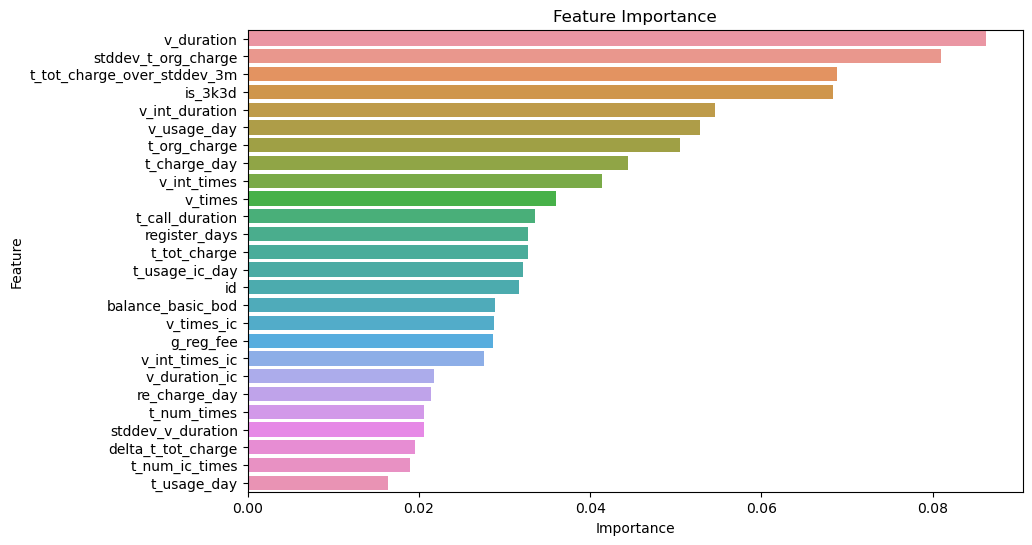

In [68]:
import seaborn as sns

# Create a DataFrame from the feature importance list
feature_importance_df = pd.DataFrame(feature_importance_list, columns=['Feature', 'Importance'])

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
#Bước 19 tạo hàm to pandas chuyển dữ liệu sang pandas dataframe dể vẽ đồ thị 
def convert_to_pd(df, primary_keys, class_col, prob):
    spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")
    res_df = df.select(primary_keys + [class_col, prob]).toPandas()
    res_df['score'] = res_df[prob].apply(lambda x : x[1])
    res_df['test'] = res_df[class_col]
    return res_df[primary_keys + ['score', 'test']] 


In [70]:
# Bước 21 Vẽ  cumulative_gains
def cumulative_gains(df, label_col, score_col):
    '''Calculate cumulative gains 
    df: original sample dataframe with label and score
    label_col: column name of label
    score_col: column name of score
    '''
    sorted_df = df.sort_values(by=score_col, ascending=False)
    sample_no = len(df)
    gain_df = pd.DataFrame()
    gain_df['Index'] = range(0, 11)
    customer_per_range = sample_no//(len(gain_df)-1)
    total_respons = sorted_df[label_col].sum()
    total_non_respons = sample_no - total_respons
    cumulative_respond = []
    cumulative_non_respond=[]
    for idx in range(0,11):
        #print(idx)
        res = 100.0 * sorted_df[label_col][: idx * customer_per_range].sum()/total_respons
        non_res = 100.0 * ((idx * customer_per_range) - res/100.0)/total_non_respons
        cumulative_respond.append(res)
        cumulative_non_respond.append(non_res)
    gain_df['Index'] = gain_df['Index'].apply(lambda x: x * 10)
    gain_df['Res_rate_raw'] = cumulative_respond
    gain_df['NonRes_rate_raw'] = cumulative_non_respond
    return gain_df

(3000, 2)


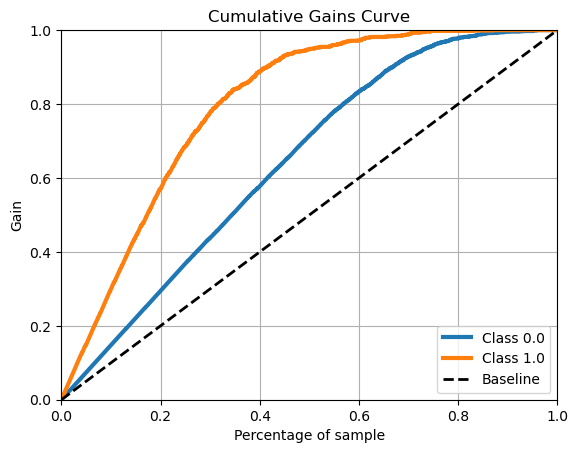

In [71]:
# Generate predicted probabilities for the positive class
y_pred_prob = model_m.predict_proba(X_test)

# Ensure the shape of y_pred_prob is as expected
print(np.shape(y_pred_prob))

# Extract the probabilities for the positive class
y_pred_prob_positive = y_pred_prob

# Plot the cumulative gain curve
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob_positive)
plt.show()


In [72]:
def cumulative_gains(df, label_col, score_col):
    '''Calculate cumulative gains 
    df: original sample dataframe with label and score
    label_col: column name of label
    score_col: column name of score
    '''
    sorted_df = df.sort_values(by=score_col, ascending=False)
    sample_no = len(df)
    gain_df = pd.DataFrame()
    gain_df['Index'] = range(0, 11)
    customer_per_range = sample_no//(len(gain_df)-1)
    total_respons = sorted_df[label_col].sum()
    total_non_respons = sample_no - total_respons
    cumulative_respond = []
    cumulative_non_respond=[]
    for idx in range(0,11):
        res = 100.0 * sorted_df[label_col][: idx * customer_per_range].sum()/total_respons
        non_res = 100.0 * ((idx * customer_per_range) - res/100.0)/total_non_respons
        cumulative_respond.append(res)
        cumulative_non_respond.append(non_res)
    gain_df['Index'] = gain_df['Index'].apply(lambda x: x * 10)
    gain_df['Res_rate_raw'] = cumulative_respond
    gain_df['NonRes_rate_raw'] = cumulative_non_respond
    gain_df['Cumulative Gains'] = gain_df['Res_rate_raw'] / gain_df['Res_rate_raw'].max()
    gain_df['Cumulative Lifts'] = gain_df['Cumulative Gains'] / gain_df['Index']
    return gain_df

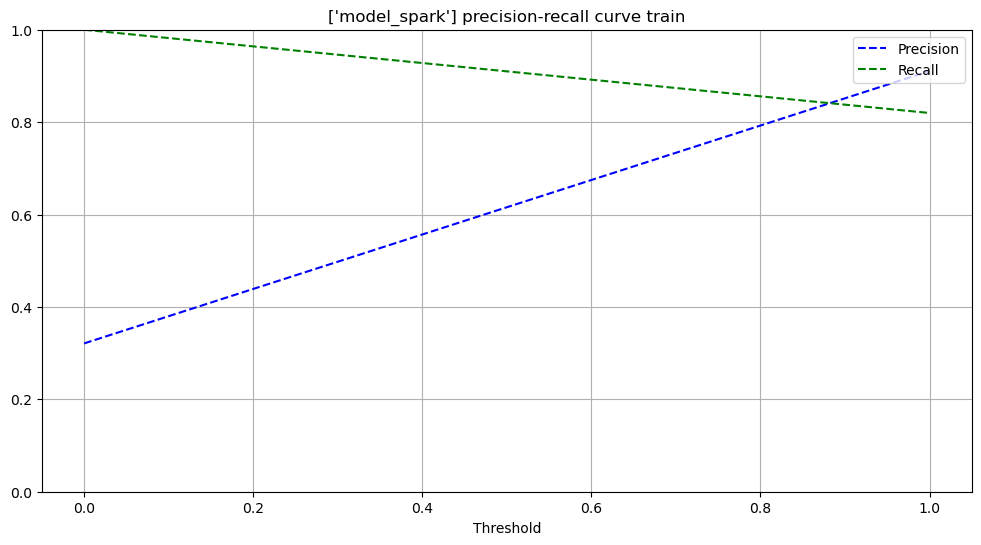

In [73]:

# Bước 23  vẽ precision recall 
train_predictions = model_m.predict(X_train)
test_predictions = model_m.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds for training set
train_precisions, train_recalls, train_thresholds = precision_recall_curve(y_train, train_predictions)

# Calculate precision and recall at different thresholds
test_precisions, test_recalls, test_thresholds = precision_recall_curve(y_test, test_predictions)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))

ax1.plot(train_thresholds, train_precisions[:-1], 'b--', label='Precision')
ax1.plot(train_thresholds, train_recalls[:-1], 'g--', label='Recall')
ax1.set_xlabel('Threshold')
ax1.legend(loc='upper right')
ax1.set_title('{} precision-recall curve train'.format(class_name))
ax1.set_ylim([0, 1])
ax1.grid(True)